In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Fifa_data.csv")

In [3]:
df1=df.drop(['Unnamed: 0','Player_Name','overall_score','potential_score','Weekly_Wage'],axis=1)

In [4]:
df1.isnull().sum()

Height             0
Weight             0
Age                0
Preferred_foot     0
Ball_Skills        0
Defence            0
Mental             0
Passing            0
Physical           0
Shooting           0
Goalkeeping        0
Market_Value      62
dtype: int64

In [5]:
df1.dropna(inplace=True)

In [6]:
df1

,Height,Weight,Age,Preferred_foot,Ball_Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
0,170,72,33,Left,96.0,30.33,73.4,89.00,79.29,86.88,10.8,103500000.0
1,187,83,35,Right,90.0,28.00,75.4,81.00,85.29,87.38,11.6,63000000.0
2,188,87,27,Right,21.0,19.00,44.0,32.00,58.43,18.50,87.4,120000000.0
3,181,70,29,Right,90.0,62.00,82.4,93.67,75.86,81.62,11.2,129000000.0
4,175,68,28,Right,95.0,31.33,71.6,84.33,78.29,83.62,11.8,132000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,171,62,35,Left,70.0,72.67,72.8,73.00,60.57,56.38,9.8,925000.0
2996,171,70,34,Left,75.5,54.00,60.0,65.67,78.71,67.75,10.6,1400000.0
2997,184,71,30,Left,72.0,26.00,66.4,55.33,75.71,67.88,9.4,3000000.0
2998,174,71,31,Left,74.5,42.67,64.4,68.33,76.29,69.88,11.2,2500000.0


In [7]:
Preferred_foot = pd.get_dummies(df1.Preferred_foot, drop_first = True)

In [8]:
df2 = df1.drop(['Preferred_foot'],axis=1)
df2.insert(5,'Preferred_foot',Preferred_foot)

In [9]:
df2.describe()

,Height,Weight,Age,Ball_Skills,Defence,Preferred_foot,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03
mean,181.499319,76.264125,27.669163,67.991661,54.489687,0.738938,65.475017,64.762747,68.924918,58.101001,17.081688,1.294732e+07
std,6.851071,7.257955,4.005972,17.967933,22.785161,0.439288,10.885495,15.049886,9.158938,15.987433,19.624692,1.606149e+07
min,158.000000,56.000000,17.000000,8.500000,9.000000,0.000000,25.800000,10.330000,27.290000,13.120000,2.000000,1.000000e+03
25%,176.000000,71.000000,25.000000,67.000000,33.000000,0.000000,62.800000,61.670000,65.290000,51.282500,9.800000,4.100000e+06
50%,182.000000,76.000000,28.000000,74.000000,65.330000,1.000000,68.000000,69.330000,70.710000,63.000000,10.800000,7.500000e+06
75%,187.000000,81.000000,30.750000,78.000000,74.330000,1.000000,72.000000,73.670000,74.860000,69.380000,12.000000,1.500000e+07
max,201.000000,103.000000,43.000000,96.000000,90.670000,1.000000,86.200000,93.670000,88.570000,87.380000,88.000000,1.855000e+08


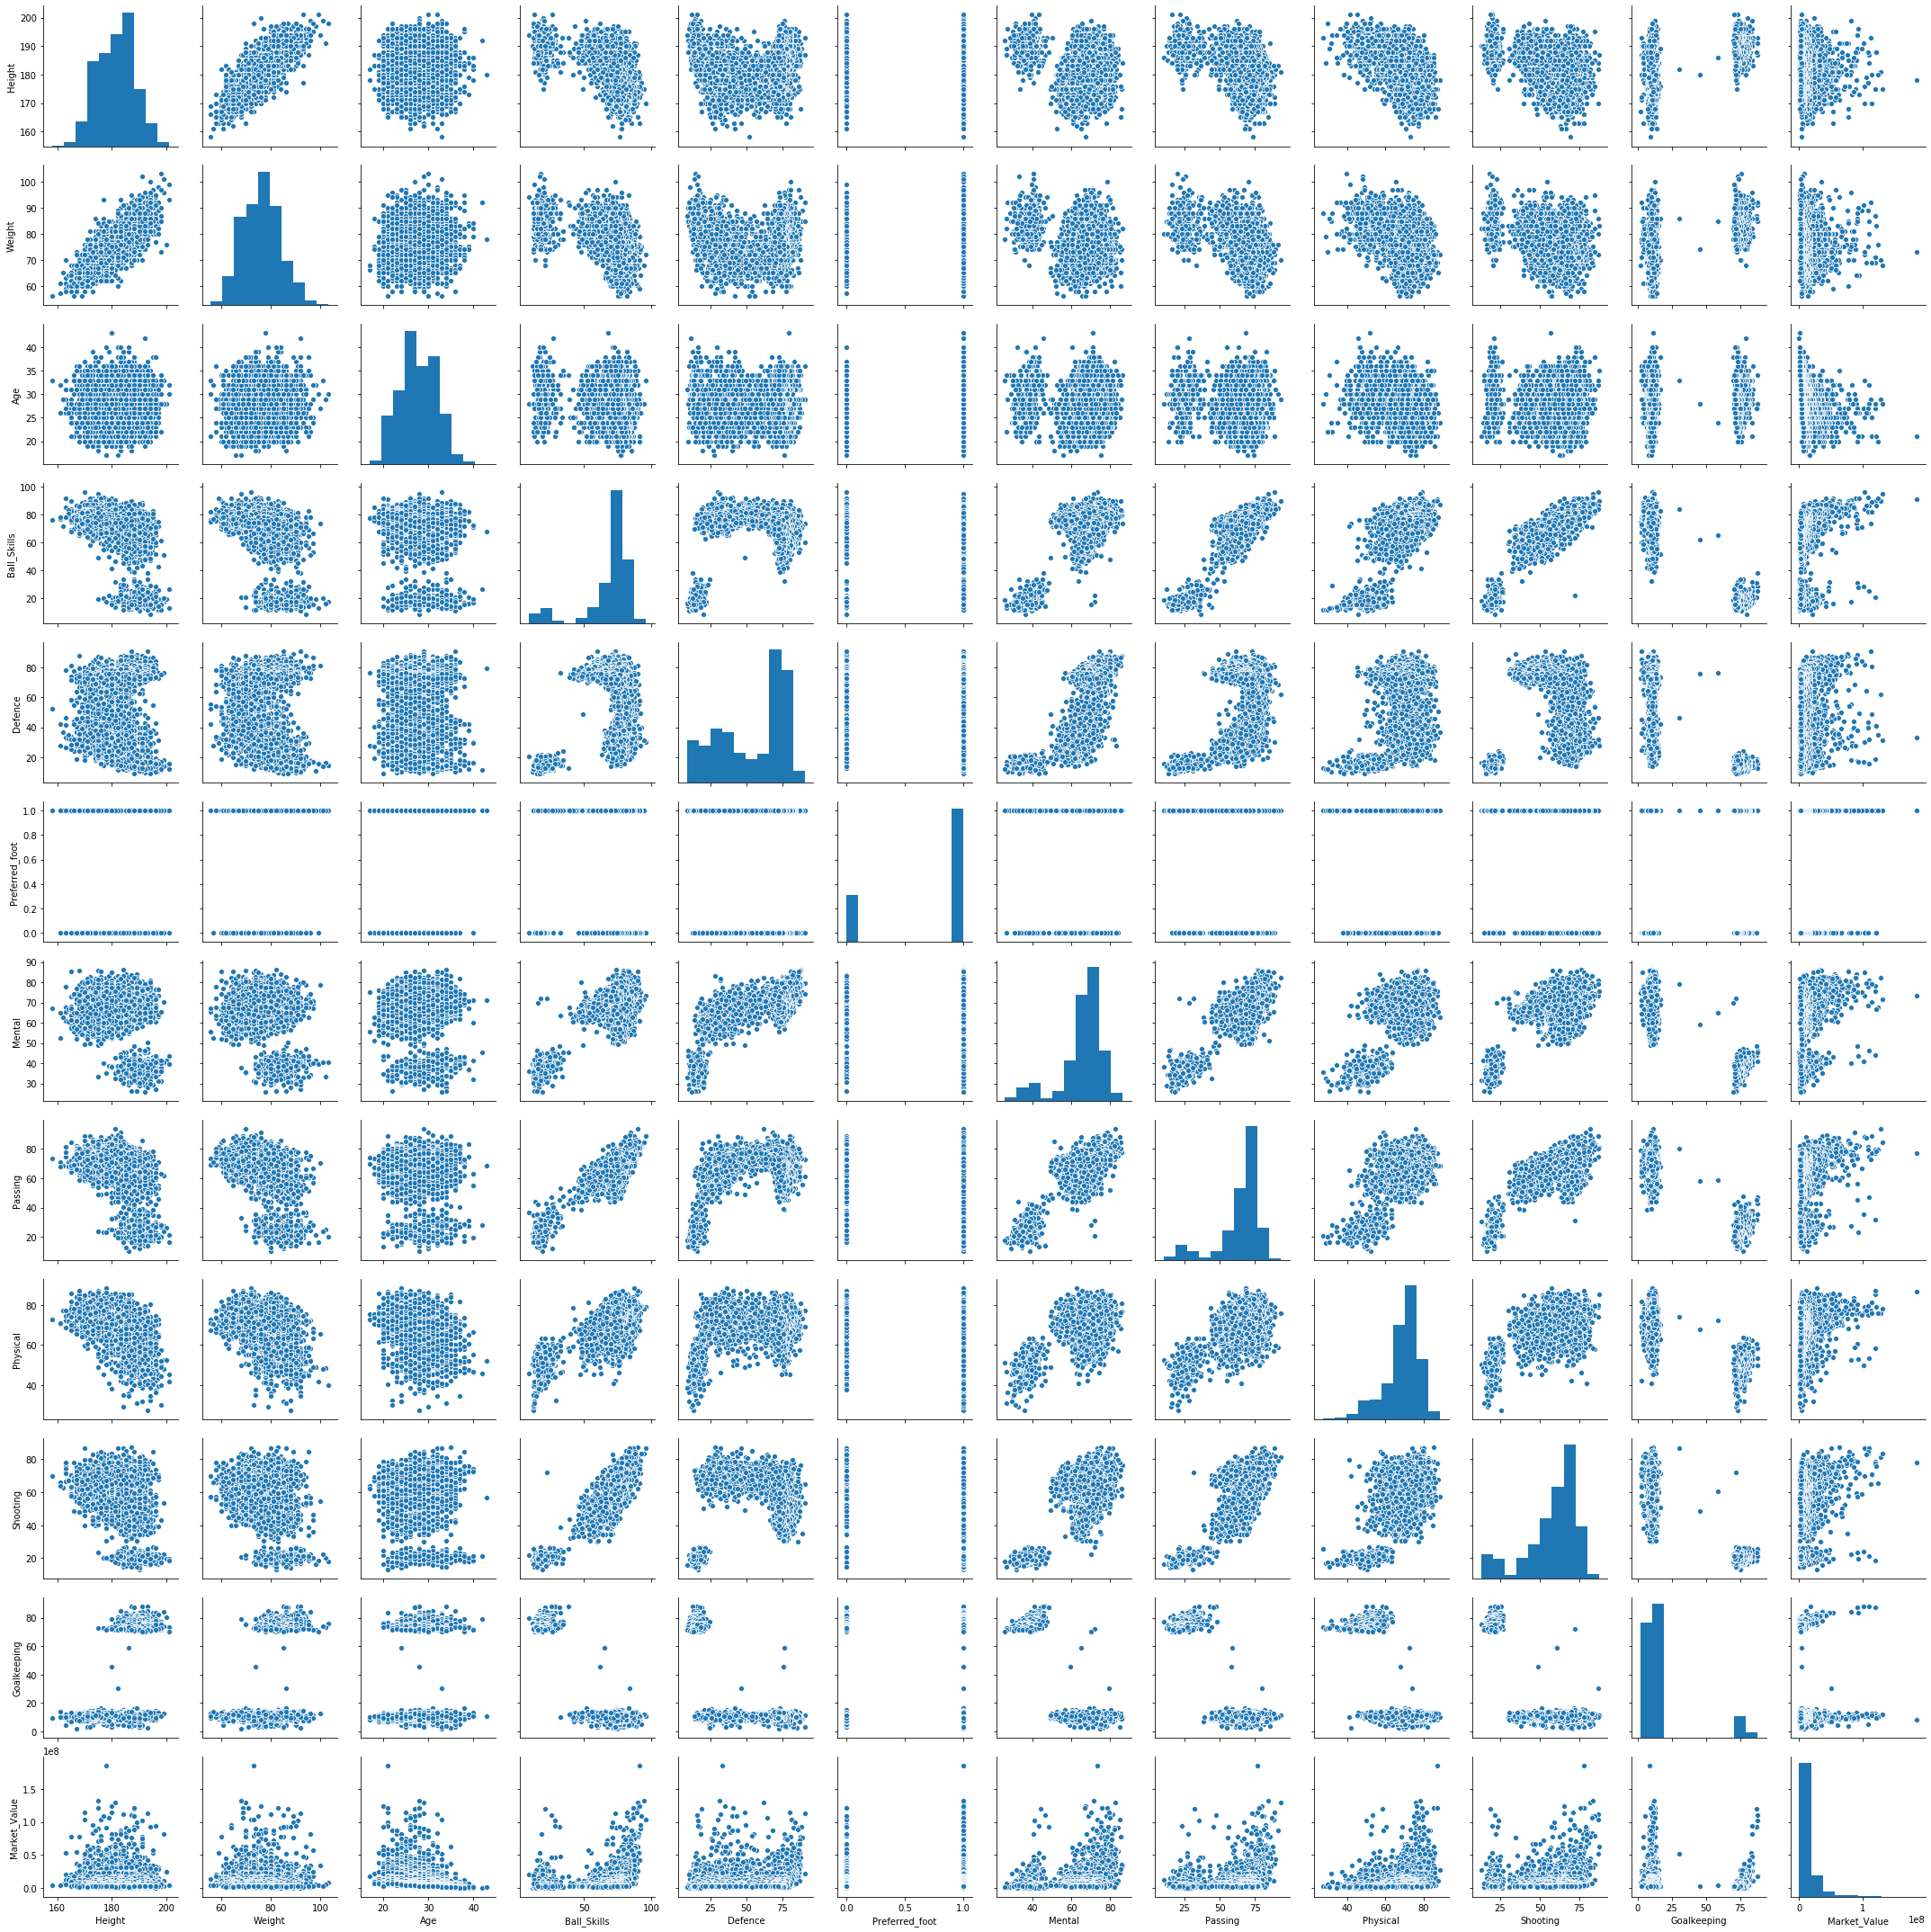

In [10]:
sns.pairplot(df2)
plt.show()

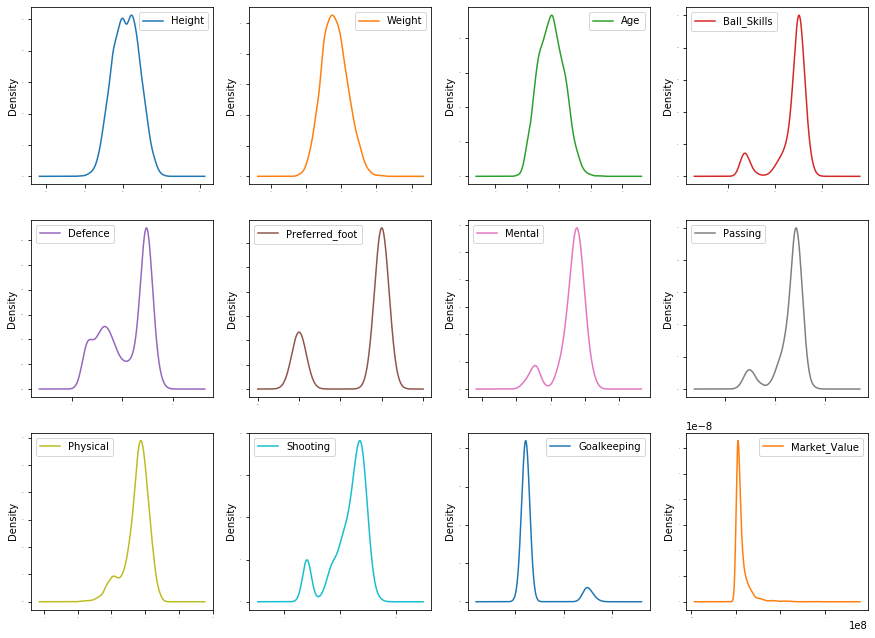

In [11]:
df2.plot(kind='density', subplots=True, layout=(4,4),fontsize=1, figsize=(15,15),sharex=False, legend=True,)
plt.show()

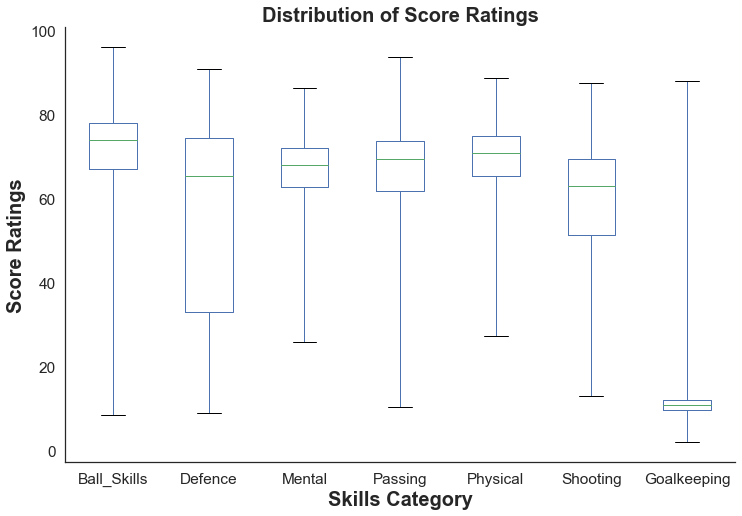

In [12]:
fig = plt.figure(figsize=[12,8])
sns.set(style = 'white', font_scale=1.4)
df2[['Ball_Skills','Defence','Mental','Passing','Physical','Shooting','Goalkeeping']].boxplot(whis='range')
plt.grid(False)
plt.xlabel('Skills Category',fontsize=20,weight='bold')
plt.ylabel('Score Ratings',fontsize=20,weight='bold')
plt.title('Distribution of Score Ratings',fontsize=20,weight='bold')
sns.despine()
#plt.savefig('boxplot.png',transparent=True, bbox_inches='tight')

In [13]:
df2.corr()

,Height,Weight,Age,Ball_Skills,Defence,Preferred_foot,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
Height,1.000000,0.784328,0.065545,-0.511411,-0.067467,0.108379,-0.276595,-0.492369,-0.513492,-0.437566,0.385811,-0.004392
Weight,0.784328,1.000000,0.171122,-0.477780,-0.089166,0.106853,-0.251583,-0.462260,-0.429325,-0.380005,0.360210,-0.015559
Age,0.065545,0.171122,1.000000,-0.169589,-0.052689,0.077827,-0.015935,-0.101879,-0.267596,-0.033312,0.154079,-0.230691
Ball_Skills,-0.511411,-0.477780,-0.169589,1.000000,0.366194,-0.116724,0.784128,0.917976,0.748356,0.898049,-0.895458,0.205945
Defence,-0.067467,-0.089166,-0.052689,0.366194,1.000000,-0.057037,0.742637,0.537182,0.301119,0.167758,-0.564891,0.029591
Preferred_foot,0.108379,0.106853,0.077827,-0.116724,-0.057037,1.000000,-0.069014,-0.147302,-0.098596,-0.103281,0.100644,-0.014085
Mental,-0.276595,-0.251583,-0.015935,0.784128,0.742637,-0.069014,1.000000,0.833894,0.612369,0.687238,-0.828176,0.220834
Passing,-0.492369,-0.462260,-0.101879,0.917976,0.537182,-0.147302,0.833894,1.000000,0.672104,0.823077,-0.853182,0.205000
Physical,-0.513492,-0.429325,-0.267596,0.748356,0.301119,-0.098596,0.612369,0.672104,1.000000,0.634332,-0.692621,0.233195
Shooting,-0.437566,-0.380005,-0.033312,0.898049,0.167758,-0.103281,0.687238,0.823077,0.634332,1.000000,-0.776902,0.183400


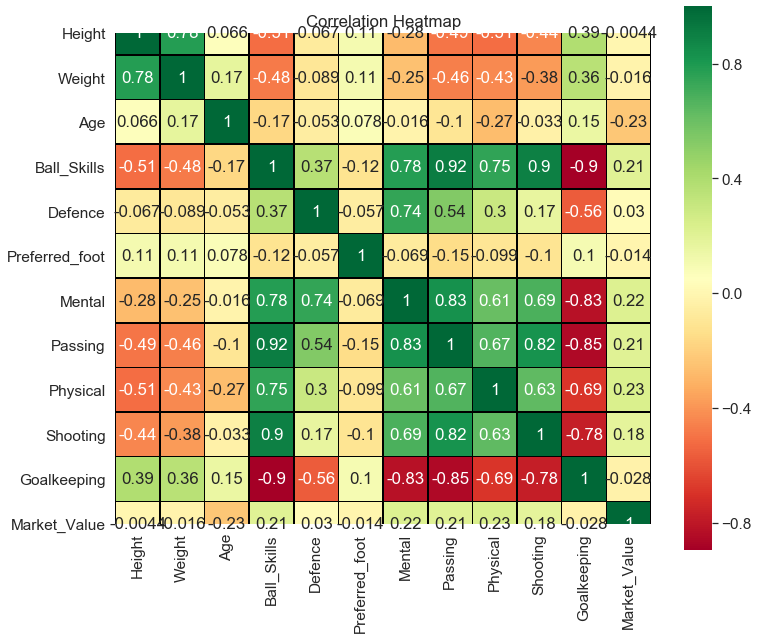

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
corr = df2.corr()
sns.heatmap(corr,square=True, ax=ax,cmap= 'RdYlGn', linewidths=0.50, linecolor='black',annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Transformation

In [15]:
df2.Market_Value.skew()

3.5519667765096647

In [16]:
market_value_transformed=np.log(df2.Market_Value)
market_value_transformed.skew()

-0.3313669405652935

## Model 1: Linear regression model

In [17]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
seed = 50
test_size = 0.20
trainingSet, testingSet = train_test_split(df2, test_size = test_size, random_state = seed)

In [19]:
lm = smf.ols(formula = "Market_Value ~ Height+Weight+Age+Preferred_foot+Ball_Skills+Defence+Mental+Passing+Physical+Shooting+Goalkeeping", data = trainingSet)
model_1 = lm.fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_Value   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          6.25e-209
Time:                        13:42:57   Log-Likelihood:                -41734.
No. Observations:                2350   AIC:                         8.349e+04
Df Residuals:                    2338   BIC:                         8.356e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.458e+08   1.21e+07    -12.

In [20]:
test_pred1= model_1.predict(testingSet[['Height', 'Weight','Age', 'Ball_Skills', 'Defence', 'Preferred_foot',
       'Mental', 'Passing', 'Physical', 'Shooting', 'Goalkeeping']])

In [21]:
print(np.sqrt(mean_squared_error(testingSet.Market_Value,test_pred1)))

14199562.531874334


## Model 2 with transformed value

In [22]:
df3 = df2.drop(['Market_Value','Height','Weight','Preferred_foot'],axis=1)
df3['market_value_transformed'] = market_value_transformed

In [23]:
seed = 50
test_size = 0.20
trainingSet, testingSet = train_test_split(df3, test_size = test_size, random_state = seed)

In [24]:
lm = smf.ols(formula = "market_value_transformed ~ Age+Ball_Skills+Defence+Mental+Passing+Physical+Shooting+Goalkeeping", data = trainingSet)
model_2 = lm.fit()
print(model_2.summary())

                               OLS Regression Results                               
Dep. Variable:     market_value_transformed   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.475
Method:                       Least Squares   F-statistic:                     266.5
Date:                      Sat, 24 Oct 2020   Prob (F-statistic):          2.03e-322
Time:                              13:42:58   Log-Likelihood:                -2531.2
No. Observations:                      2350   AIC:                             5080.
Df Residuals:                          2341   BIC:                             5132.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [25]:
test_pred2= model_2.predict(testingSet[['Age', 'Ball_Skills', 'Defence','Mental', 'Passing',
                                         'Physical', 'Shooting', 'Goalkeeping']])

In [26]:
print(np.sqrt(mean_squared_error(testingSet.market_value_transformed,test_pred2)))

0.7282915123705627


## Model_3

In [27]:
X= df3.drop("market_value_transformed",axis=1)
y=df3['market_value_transformed']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_3 = lr.fit(X_train, y_train)

In [30]:
model_3.score(X_train,y_train)

0.4766598140907249

In [31]:
model_3.score(X_test,y_test)

0.4921971513316642

In [32]:
#y_train_pred2=model_2.predict(y_train)
y_test_pred3=model_3.predict(X_test)

In [33]:
#print(np.sqrt(mean_squared_error(y_train,y_train_pred2)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred3)))

0.7282915123705629


In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_3,X,y,cv=5,scoring="r2")
score

array([-2.90156594, -0.22000503, -0.10396441, -0.63053666, -1.51807756])

In [35]:
score.mean()

-1.0748299228948148

## Model 4


In [36]:
X=df3.drop("market_value_transformed",axis=1)
y=df3.market_value_transformed

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr= RandomForestRegressor()
model_4=rfr.fit(X_train,y_train)

In [40]:
print("Score based on training data:")
print("Adjusted R-squared : {}%".format((model_4.score(X_train,y_train)*100).round(2)))

Score based on training data:
Adjusted R-squared : 97.47%


In [41]:
test_pred4 = model_4.predict(X_test)

In [42]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((model_4.score(X_test,y_test)*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(test_pred4,y_test)).round(2))


Score based on testing data:
Adjusted R-squared : 80.03%
RMSE : 0.46


In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_4,X,y,cv=5)

In [44]:
score.mean()

-0.051261809977881365

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [47]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [48]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=True, random_state = 50, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=50, verbose=True)

In [49]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 33,
 'bootstrap': True}

In [50]:
model_44 = RandomForestRegressor(**{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True})

In [51]:
model_44.fit(X_train,y_train)

RandomForestRegressor(max_depth=110, min_samples_split=5, n_estimators=1000)

In [52]:
model_44.score(X_train,y_train)

0.9671409318910899

In [53]:
test_pred44 = model_44.predict(X_test)

In [54]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((model_44.score(X_test,y_test)*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(test_pred44,y_test)).round(2))

Score based on testing data:
Adjusted R-squared : 81.03%
RMSE : 0.45


In [55]:
import pickle

file = open("FIFA_RFR_MODEL.pkl","wb")
pickle.dump(model_44,file)

## Model5

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [57]:
X=df3.drop("market_value_transformed",axis=1)
y=df3.market_value_transformed

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [59]:

for degree in range(2,7):
    model_5 = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    result_5 = model_5.fit(X_train, y_train)
    r2 = result_5.score(X_test,y_test)
    pred_5 = result_5.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_5))
    print("R2",r2)
    print("RMSE",rmse)
    print("==========================")

R2 0.778737835853196
RMSE 0.4807411080842943
R2 0.8204393907858455
RMSE 0.4330751029787362
R2 -0.005502182537796774
RMSE 1.0248237724691593
R2 -102.95393772690326
RMSE 10.420250385709254
R2 -20574339.311121184
RMSE 4635.756775498117


In [60]:
poly = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly= poly.fit(X_train,y_train)
predicted = poly.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predicted)))
print(r2_score(y_test, predicted)*100)


0.4330751029787362
82.04393907858454


In [61]:
from sklearn.model_selection import KFold

In [62]:
kf = KFold(n_splits=5,shuffle=True,random_state=50)

In [63]:
model_55 = make_pipeline(PolynomialFeatures(3),LinearRegression())
Mean_R2_Poly_CV = np.mean(cross_val_score(model_55, X_train, y_train, cv=kf, scoring='r2'))
Mean_R2_Poly_CV


0.7828273734660867